<a href="https://colab.research.google.com/github/krishroop/Fashion-Classification-using-Deep-Learning/blob/main/Prediction_using_unmodified_ResNet50_on_Apparel_classification_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15481646987741237993, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13552323407202307099
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

#1.Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
image_path = "sample_data/testImage.jpg"

#2. Loading Image and opening it

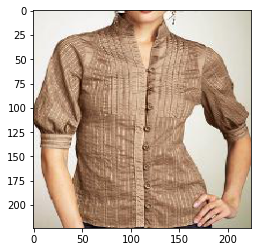

In [5]:
from keras.preprocessing import image

img = image.load_img(image_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

#3.Preprocessing the Image

In [6]:
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

testImage=image.img_to_array(img)
testImage=np.expand_dims(testImage,axis=0)
ProcessedTestImage=preprocess_input(testImage)

#4.Importing ResNet50 model and printing its details

In [8]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top = 'True')

model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

#5.Using ResNet50 to predict labels for testImage

40960/35363 [==================================] - 0s 0us/step


[[('n02963159', 'cardigan', 0.8878772),
  ('n04599235', 'wool', 0.022991551),
  ('n03770439', 'miniskirt', 0.019521128),
  ('n04350905', 'suit', 0.017895991),
  ('n03594734', 'jean', 0.008406941),
  ('n03866082', 'overskirt', 0.005060612),
  ('n03877472', 'pajama', 0.0034804638),
  ('n03000247', 'chain_mail', 0.0033005835),
  ('n03838899', 'oboe', 0.0029524707),
  ('n04479046', 'trench_coat', 0.0024533619)]]

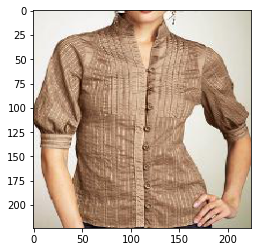

In [9]:
feature = model.predict(ProcessedTestImage)
plt.imshow(img)
decode_predictions(feature,10)